In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import seaborn as sns
from sklearn import datasets

c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\SHEKHAR\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shekharbiswas/MHC/main/mental-heath-in-tech-2016_20161114.csv')

# MHC : mental health condition


df = df.rename(columns={'What is your gender?': 'Gender', 
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed'
                        })


df

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [59]:
#df.dropna()

In [68]:
df.dtypes.index

Index(['self-employed',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a

In [69]:
# get all numeric columns
bools = []
col_num = []

for i, type in enumerate(df.dtypes):
    if type != 'object':
        bools.append(True)
        col_num.append(i)

    else:
        bools.append(False)
col_num = list(df.dtypes[col_num].index)
col_num

['self-employed',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?',
 'Do you have previous employers?',
 'Have you ever sought treatment for a mental health issue from a mental health professional?',
 'Age']

In [70]:
df.isna().sum()

self-employed                                                                           0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
US_state_live                                                                         593
What country do you work in?                                                            0
US_state_work                                                                         582
work_pos                                                                                0
Remote                                                                                  0
Length: 63

In [71]:
df.head(4)

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes


In [72]:
df.dtypes

self-employed                                                                          int64
How many employees does your company or organization have?                            object
Is your employer primarily a tech company/organization?                              float64
Is your primary role within your company related to tech/IT?                         float64
Does your employer provide mental health benefits as part of healthcare coverage?     object
                                                                                      ...   
US_state_live                                                                         object
What country do you work in?                                                          object
US_state_work                                                                         object
work_pos                                                                              object
Remote                                                                

<Axes: >

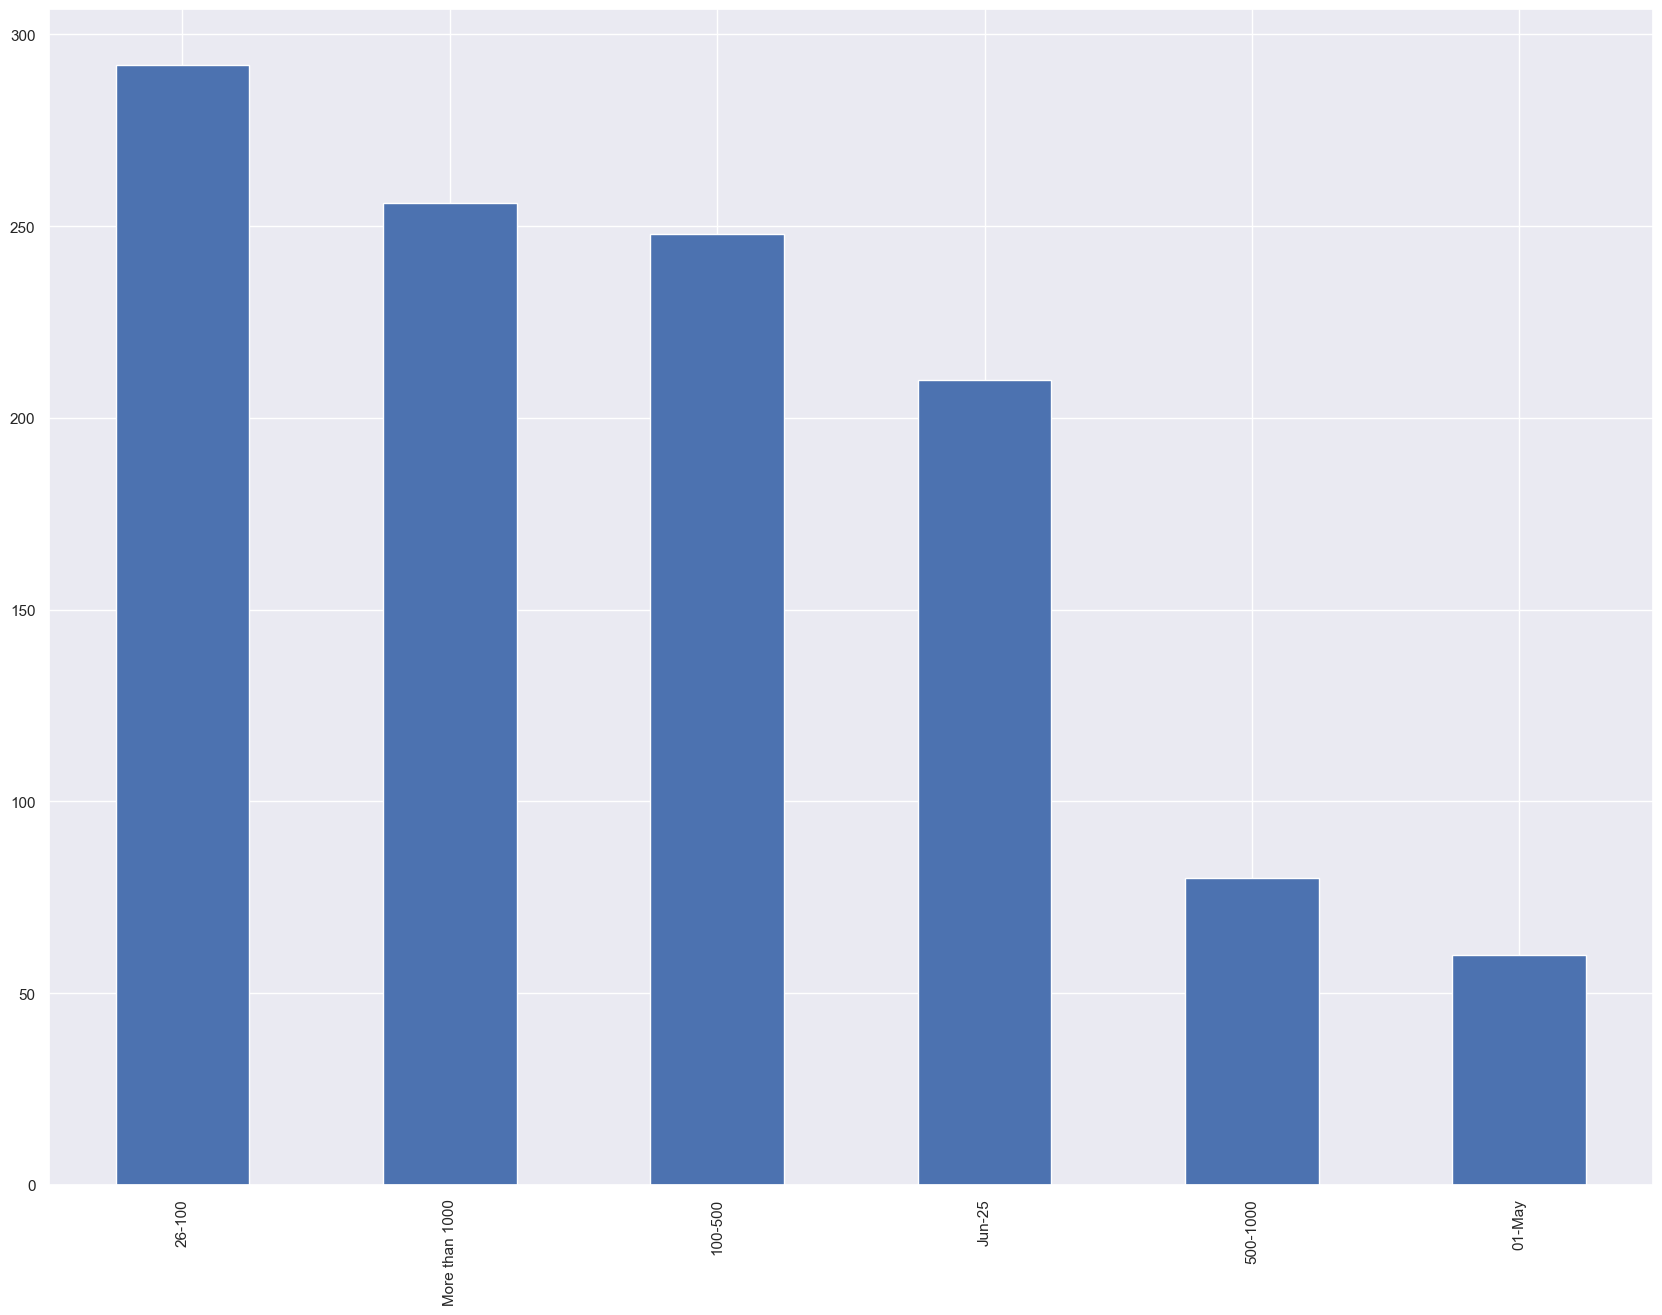

In [73]:
df['How many employees does your company or organization have?'].value_counts().plot(kind = 'bar')

In [74]:
df_num = df[col_num]
df_num

,self-employed,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,Age
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


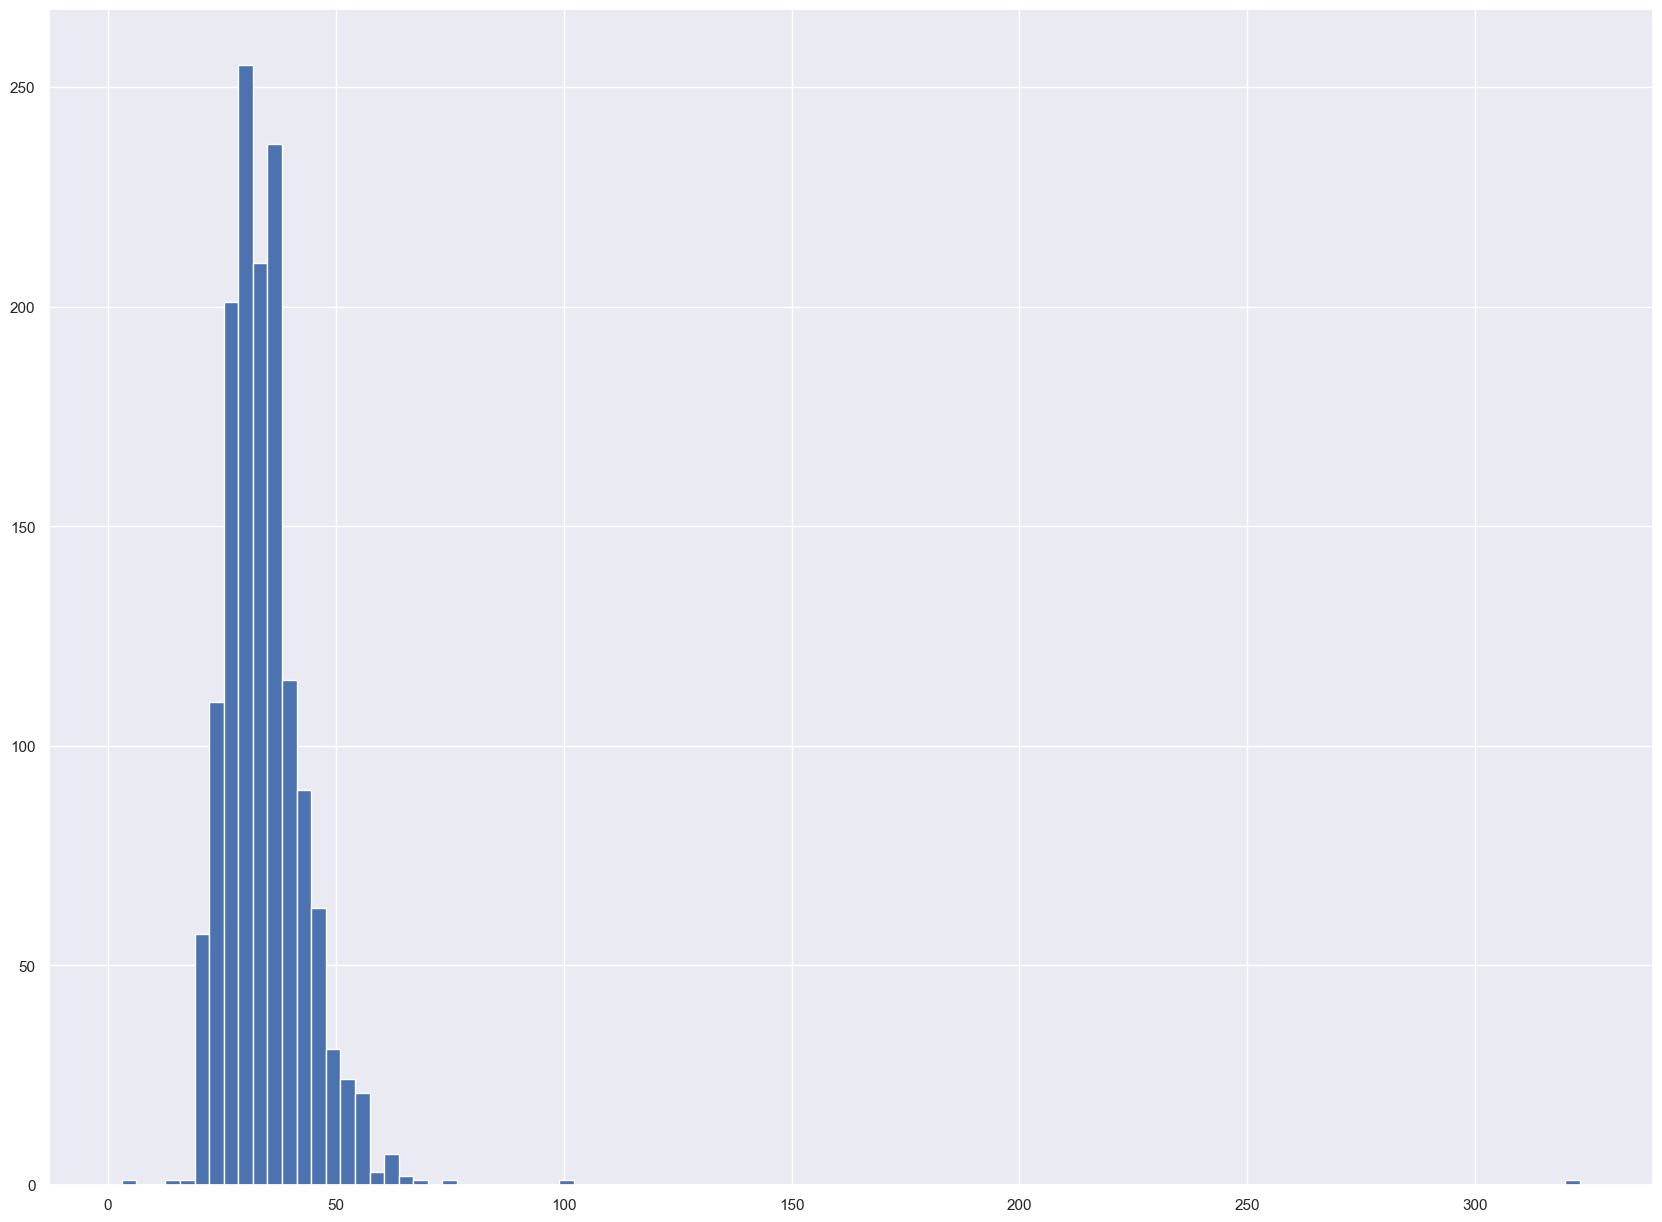

In [76]:
plt.hist(df_num['Age'], bins = 100);


In [12]:
df_num[df_num['What is your age?'] >= 100]

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
564,0,1.0,NaN,NaN,1,0,323


In [13]:
df[df['What is your age?'] > 85]

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
372,0,Jun-25,1.0,NaN,Yes,No,No,I don't know,Yes,Somewhat easy,...,Rarely,Often,99,Other,United States of America,Michigan,United States of America,Michigan,Supervisor/Team Lead,Sometimes
564,0,100-500,1.0,NaN,Yes,No,I don't know,I don't know,I don't know,I don't know,...,Not applicable to me,Not applicable to me,323,Male,United States of America,Oregon,United States of America,Oregon,Back-end Developer,Sometimes


In [14]:
df_num.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


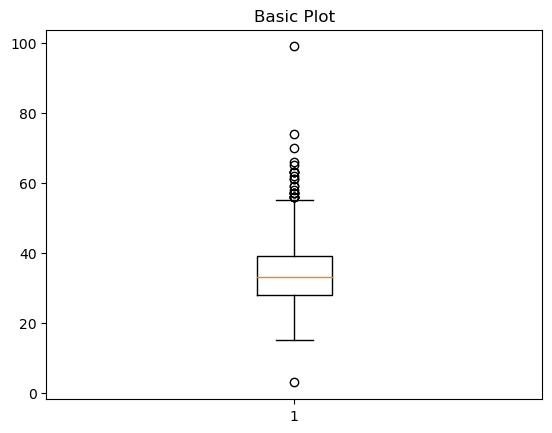

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_num[df_num['What is your age?'] <= 100] ['What is your age?']);

In [16]:
# Check summary statistics for numerical features
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [17]:
# Explore other columns and their unique values
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

Are you self-employed?: [0 1]
How many employees does your company or organization have?: ['26-100' 'Jun-25' nan 'More than 1000' '100-500' '500-1000' '01-May']
Is your employer primarily a tech company/organization?: [ 1. nan  0.]
Is your primary role within your company related to tech/IT?: [nan  1.  0.]
Does your employer provide mental health benefits as part of healthcare coverage?: ['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
Do you know the options for mental health care available under your employer-provided coverage?: [nan 'Yes' 'I am not sure' 'No']
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: ['No' 'Yes' nan "I don't know"]
Does your employer offer resources to learn more about mental health concerns and options for seeking help?: ['No' 'Yes' nan "I don't know"]
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatmen

In [18]:
# Handle non-standardized textual inputs - encode text data using techniques like Label Encoding or One-Hot Encoding
# Example using Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
# Check column names
print(df.columns)

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [20]:
df_num['Are you self-employed?'].value_counts()

0    1146
1     287
Name: Are you self-employed?, dtype: int64

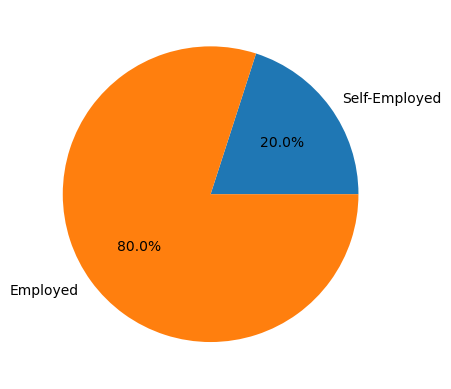

In [21]:
labels = 'Self-Employed', 'Employed'
sizes = [287, 1146]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');

In [22]:
df_num

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [23]:
df_num['Is your employer primarily a tech company/organization?'].value_counts()

1.0    883
0.0    263
Name: Is your employer primarily a tech company/organization?, dtype: int64

In [24]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 1, 'Are you self-employed?'].value_counts()

# There is no self-employed person working for tech

0    883
Name: Are you self-employed?, dtype: int64

In [25]:
df_num.loc[df_num['Is your employer primarily a tech company/organization?'] == 0, 'Are you self-employed?'].value_counts()

0    263
Name: Are you self-employed?, dtype: int64

In [26]:
883 + 263

1146

In [27]:
df_num[df_num['Are you self-employed?']== 1]

# Self employed people did not respond to Q:

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
3,1,NaN,NaN,1.0,1,1,43
9,1,NaN,NaN,1.0,1,1,30
18,1,NaN,NaN,1.0,0,1,25
24,1,NaN,NaN,1.0,1,0,38
33,1,NaN,NaN,0.0,1,0,37
...,...,...,...,...,...,...,...
1404,1,NaN,NaN,0.0,1,1,29
1408,1,NaN,NaN,1.0,1,0,34
1420,1,NaN,NaN,1.0,1,0,29
1428,1,NaN,NaN,1.0,1,1,34


In [28]:
# 1. Check for all numeric data

# 2. Create a function to know which columns are object

# 3. Check for non-Numeric ( Strings / Object ) 

In [29]:
df_num

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
0,0,1.0,NaN,NaN,1,0,39
1,0,1.0,NaN,NaN,1,1,29
2,0,1.0,NaN,NaN,1,1,38
3,1,NaN,NaN,1.0,1,1,43
4,0,0.0,1.0,NaN,1,1,43
...,...,...,...,...,...,...,...
1428,1,NaN,NaN,1.0,1,1,34
1429,1,NaN,NaN,1.0,0,0,56
1430,0,1.0,NaN,NaN,1,1,52
1431,0,0.0,1.0,NaN,1,0,30


In [30]:
df.shape

(1433, 63)

In [31]:
cols = df.columns

In [32]:
df

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [33]:
df_52 = df['What US state or territory do you live in?'].value_counts().reset_index()

In [34]:
df_52

,index,What US state or territory do you live in?
0,California,130
1,Illinois,56
2,Michigan,48
3,New York,45
4,Washington,43
5,Texas,43
6,Minnesota,42
7,Oregon,37
8,Pennsylvania,33
9,Colorado,28


In [35]:
import plotly.express as px

fig = px.bar(df_52, x='index', y='What US state or territory do you live in?')
fig.show()

In [36]:
df.columns[['mental' in c for c in df.columns]]

Index(['Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discussing a mental he

In [37]:
df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()

Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: Does your employer provide mental health benefits as part of healthcare coverage?, dtype: int64

In [38]:
df_x = df.loc[df['What US state or territory do you live in?'].isin(['California', 'Illinois', 'New York']), ['Does your employer provide mental health benefits as part of healthcare coverage?', 'What US state or territory do you live in?']]

df_x.columns =['employer_provide_mh_benefits', 'state']
df_x

,employer_provide_mh_benefits,state
1,No,Illinois
4,Yes,Illinois
8,I don't know,California
20,No,New York
24,NaN,New York
...,...,...
1411,Yes,New York
1414,Yes,New York
1427,Yes,Illinois
1428,NaN,New York


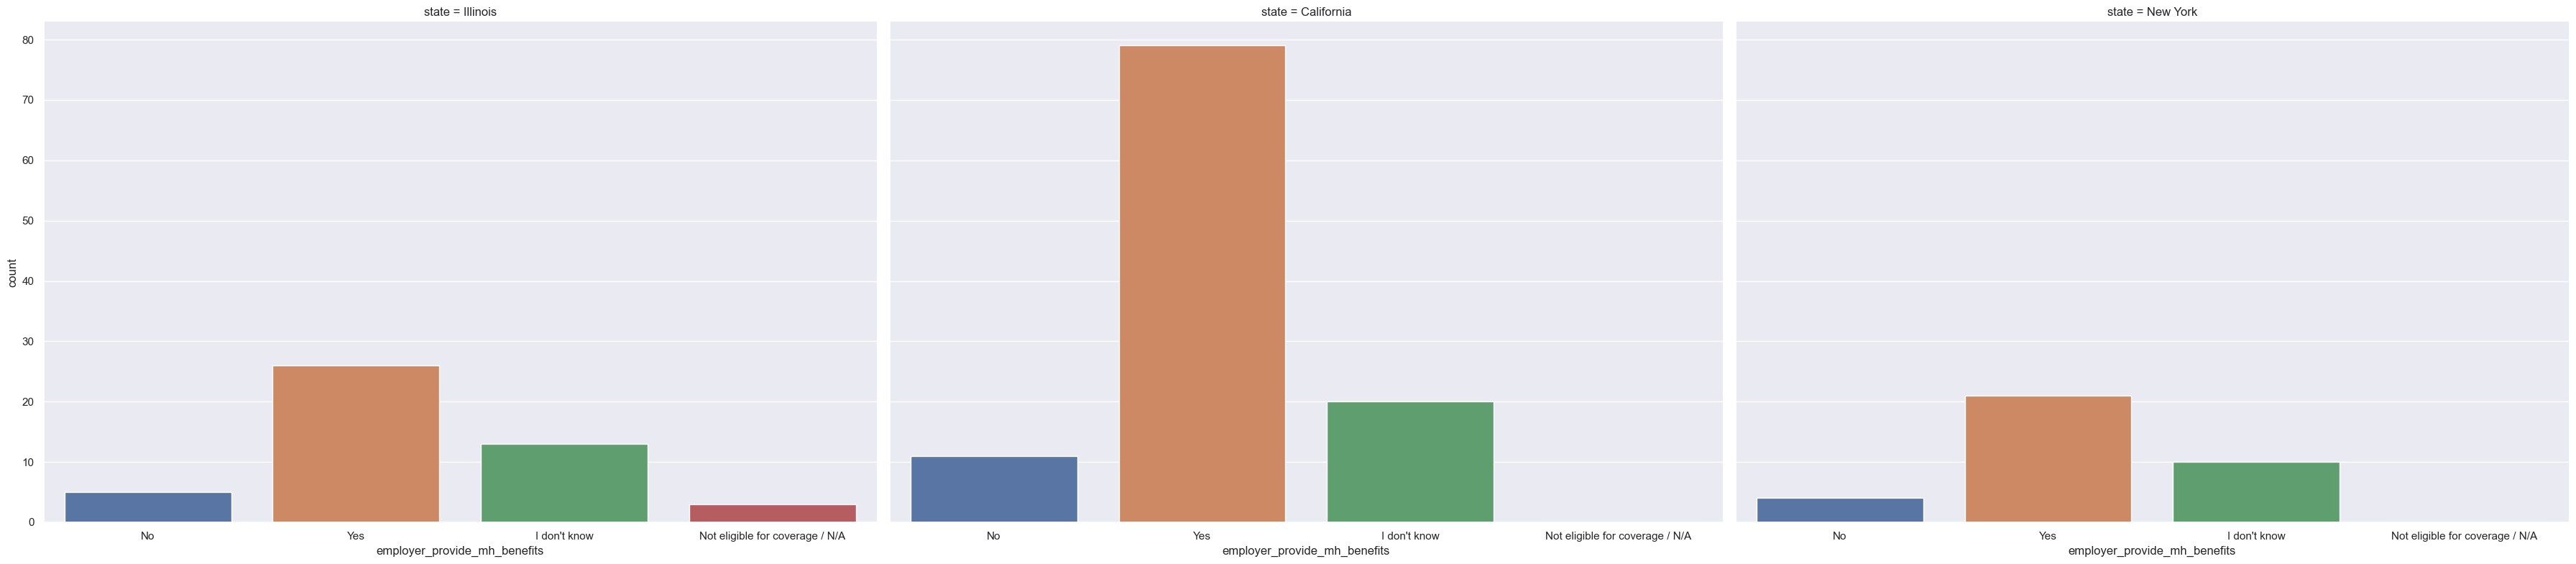

In [39]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20.7,15.27)})

sns.catplot(
    data=df_x, x="employer_provide_mh_benefits", col="state",
    kind="count", height=8, aspect=1.5,
)

**Do you currently have a mental health disorder?**

In [41]:
df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [45]:
df_48 = df['Do you currently have a mental health disorder?'].value_counts().reset_index()

df_48.columns = ['Answer', 'Count_Mental_Disorder']

In [47]:
fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()


In [60]:
df1 = df.copy()

#Create separate columns for presence of each MHC for easier filter
df1['Anxiety Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Anxiety Disorder')
df1['Mood Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Mood Disorder')
df1['ADHD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Attention')
df1['OCD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Compulsive')
df1['PTSD'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Post')
df1['PTSD undiagnosed'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('PTSD \(undiagnosed\)')
df1['Eating Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Eating')
df1['Substance Use Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Substance')
df1['Stress Response Syndrome'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Stress Response')
df1['Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Personality Disorder')
df1['Pervasive Developmental Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Pervasive')
df1['Psychotic Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Psychotic')
df1['Addictive Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Addictive Disorder')
df1['Dissociative Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Dissociative')
df1['Seasonal Affective Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Seasonal')
df1['Schizotypal Personality Disorder'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Schizotypal')
df1['Traumatic Brain Injury'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Brain')
df1['Sexual Addiction'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Sexual')
df1['Autism'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('Autism')
df1['ADD w/o Hyperactivity)'] = df1['If yes, what condition(s) have you been diagnosed with?'].str.contains('ADD \(w/o Hyperactivity\)')



In [62]:
df1[['Anxiety Disorder', 'Mood Disorder' ]]

,Anxiety Disorder,Mood Disorder
0,NaN,NaN
1,True,True
2,NaN,NaN
3,True,True
4,True,False
...,...,...
1428,NaN,NaN
1429,NaN,NaN
1430,NaN,NaN
1431,True,True


In [54]:
df1['Sexual Addiction'].value_counts()

False    567
True       1
Name: Sexual Addiction, dtype: int64

In [52]:
#create dfs to 4 population types, no mental conditions, at least both anxiety & depression, 
#at least ADHD, and at least OCD
df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]

In [55]:
#Display population size of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD', 'PTSD', 'OCD']
df_group_values = [len(df1), len(df_no_MHD), len(df_anx_dep), 
                   len(df_adhd), len(df_ptsd), len(df_ocd)]

df_MHD_count = pd.DataFrame(columns = ['Population', 'Count'])
df_MHD_count['Population'] = df_group
df_MHD_count['Count'] = df_group_values
df_MHD_count

,Population,Count
0,Total Population,1433
1,No MHC,531
2,Anxiety & Depression,253
3,ADHD,121
4,PTSD,69
5,OCD,45


Text(2, 1.15, 'Common MHCs in the Tech Workplace')

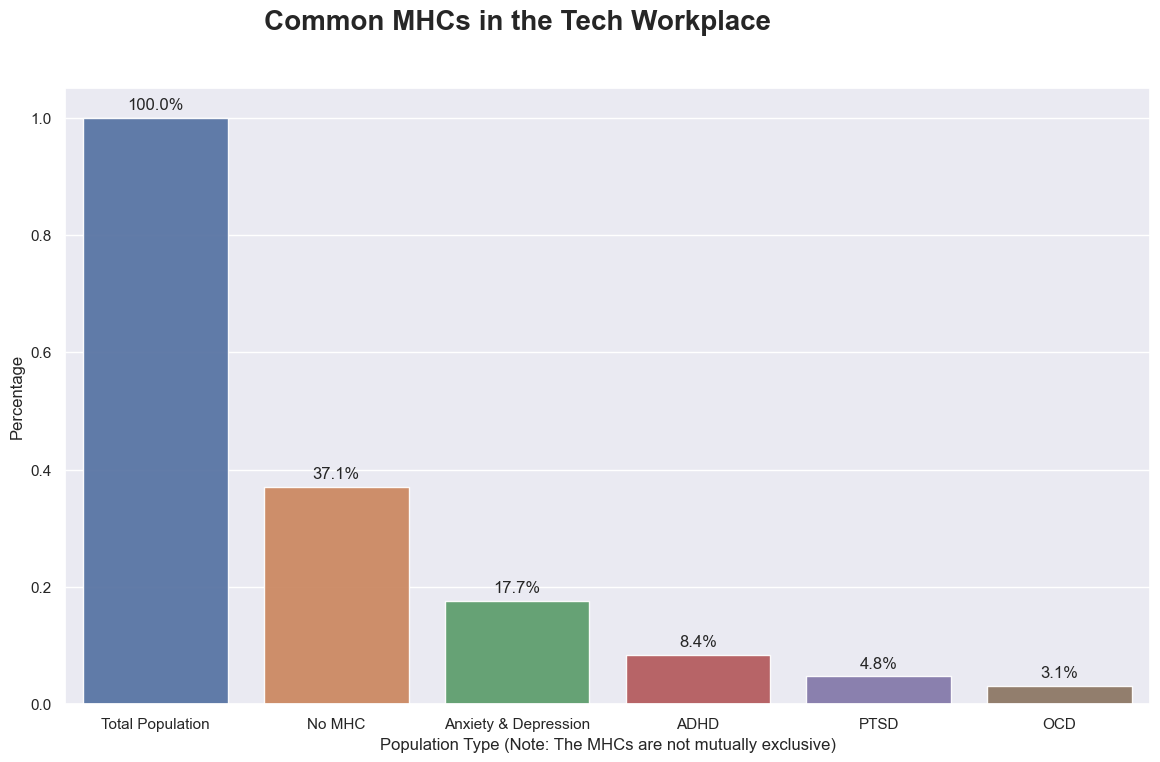

In [56]:
#Display proportions of each group
df_group = ['Total Population', 'No MHC', 'Anxiety & Depression', 'ADHD','PTSD', 'OCD']
df_group_values = [len(df1)/len(df1), len(df_no_MHD)/len(df1), len(df_anx_dep)/len(df1), 
                   len(df_adhd)/len(df1),len(df_ptsd)/len(df1), len(df_ocd)/len(df1)]

#bar plot creation
sns.set(style="darkgrid")
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x = df_group, y = df_group_values,alpha =.95)
ax1.set(xlabel = 'Population Type (Note: The MHCs are not mutually exclusive)')
ax1.set(ylabel = 'Percentage')

# annotate bar plots
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1%'),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.text(2, 1.15, 'Common MHCs in the Tech Workplace',weight='bold',
         horizontalalignment='center',fontsize=20)

In [63]:
df['Do you work remotely?']

0       Sometimes
1           Never
2          Always
3       Sometimes
4       Sometimes
          ...    
1428    Sometimes
1429    Sometimes
1430    Sometimes
1431    Sometimes
1432    Sometimes
Name: Do you work remotely?, Length: 1433, dtype: object

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,Country,US_state_live,What country do you work in?,US_state_work,work_pos,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [78]:

df1 = df1.rename(columns={'What is your gender?': 'Gender', 
                        'What is your age?': 'Age',
                        'What country do you live in?': 'Country',
                        'What US state or territory do you live in?': 'US_state_live',
                        'Do you work remotely?': 'Remote',
                        'What US state or territory do you work in?': 'US_state_work',
                        'Which of the following best describes your work position?' : 'work_pos',
                        'Have you been diagnosed with a mental health condition by a medical professional?' : 'Diagnosed_mhc_by_medical_professional',
                        'Are you self-employed?' : 'self-employed'
                        })

In [82]:
df1['Gender'].value_counts().reset_index()

,index,Gender
0,Male,610
1,male,249
2,Female,153
3,female,95
4,M,86
...,...,...
65,cis male,1
66,Human,1
67,Genderfluid,1
68,Enby,1


In [125]:
# Top MHC Disorders

import re

def retun_clean_data(str1):
    try:
        clean = re.sub('[^a-zA-Z0-9]', '', str1)

    except:
        clean = str1

    return clean


df1['Gender'] = df1['Gender'].apply(lambda x: retun_clean_data(x))



df_no_MHD = df1.loc[(df1['Do you currently have a mental health disorder?'] == 'No')]
df_anx_dep = df1.loc[(df1['Anxiety Disorder'] == 1) & (df1['Mood Disorder'] == 1)]
df_adhd = df1.loc[(df1['ADHD'] == 1)]
df_ocd = df1.loc[(df1['OCD'] == 1)]
df_ptsd = df1.loc[(df1['PTSD'] == 1)]



In [126]:
#df_no_MHD['Gender'] = df_no_MHD['Gender'].str.strip()
df_no_MHD['Gender'].value_counts()

Male                     235
male                     103
M                         45
Female                    42
m                         38
female                    32
F                         11
f                          9
Woman                      3
man                        2
fm                         1
Genderfluidbornfemale      1
femalewoman                1
Cismale                    1
Malecis                    1
Sexismale                  1
Malr                       1
Dude                       1
fem                        1
Man                        1
MALE                       1
Name: Gender, dtype: int64

In [130]:
df_no_MHD.loc[df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'M'
df_no_MHD.loc[~df_no_MHD['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude'), 'Gender'] = 'F'

In [136]:
df_no_MHD['Gender'].value_counts().reset_index()

,index,Gender
0,M,511
1,F,20


In [137]:

fig = px.pie(df_no_MHD['Gender'].value_counts().reset_index(), values='Gender', names='index', title='Male and Female proportion withput MHC')
fig.show()

In [149]:
df1['Gender'].value_counts().reset_index().head(30)

,index,Gender
0,M,1348
1,F,85


In [147]:
df1.loc[df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'M'
df1.loc[~df1['Gender'].str.contains('Male|male|M|m|Man|man|Malr|Sex is male|Malecis|Cismale|Sexismale|MALE|Dude',  na=False), 'Gender'] = 'F'

In [ ]:
df1.columns

In [166]:
# Group by - this helps to group based on your criteria - this case Gender and MHC
df_mhc = df1.groupby(['Gender', 'Do you currently have a mental health disorder?'])['self-employed'].count().reset_index()
df_mhc['G_D'] = df_mhc['Gender'] + '_' +  df_mhc['Do you currently have a mental health disorder?']
df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :]

,Gender,Do you currently have a mental health disorder?,self-employed,G_D
0,F,Maybe,17,F_Maybe
1,F,No,20,F_No
2,F,Yes,48,F_Yes


In [170]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('F'), :], values='self-employed', names='G_D')
fig.show()

In [169]:
fig = px.pie(df_mhc.loc[df_mhc['G_D'].str.startswith('M'), :], values='self-employed', names='G_D')
fig.show()

In [138]:


fig = px.pie(df_48, values='Count_Mental_Disorder', names='Answer', title='Do you have Mental Disorder ?')
fig.show()

,self-employed,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,Pervasive Developmental Disorder,Psychotic Disorder,Addictive Disorder,Dissociative Disorder,Seasonal Affective Disorder,Schizotypal Personality Disorder,Traumatic Brain Injury,Sexual Addiction,Autism,ADD w/o Hyperactivity)
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,False,False,False,False,False,False,False,False,False,False
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Gender + Diseases